In [3]:
import pandas as pd
import re
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS

In [9]:
df = pd.read_csv('US_youtube_trending_data_sentiment.csv')

In [3]:
# Downloads the data.
import nltk
nltk.download('stopwords')

# Using the stopwords.
from nltk.corpus import stopwords

# Initialize the stopwords
stopWords = stopwords.words('english')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>


In [4]:
stopWords = nltk.corpus.stopwords.words("English")

with open('C:/Users/nirma/AppData/Roaming/nltk_data/corpora/stopwords/english') as f:
    stopWords = f.readlines()

nltk.download('names')
names = nltk.corpus.names.words()
df = df[df["description"].notnull()]

#remove some very common words which add little information to the sentiment of the description - i.e. company names

extraStopWords = ['ft', 'feat', 'feature', 'video', 'music', 'twitter', 'instagram', 'facebook', 'channel', 'youtube',
                 'show', 'subscribe', 'film', 'website', 'google', 'tumblr', 'album', 'movie']

[stopWords.append(w) for w in extraStopWords]

names = [n.lower() for n in names]

[nltk_data] Error loading names: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>


In [16]:
numRecords = df["description"].size

def CleanDescription(PhraseToClean):
    CleanWords = [w for w in PhraseToClean.split() if NotUrl(w)]      
    CleanWords = [RemoveNonAlphaNumeric(w) for w in CleanWords]
    CleanWords = [w for w in CleanWords if  NotInStopWords(w) and NotInNames(w)]
    return ' '.join(CleanWords)

def NotInStopWords(word):
    return word.lower() not in stopWords

def NotInNames(word):
    return word.lower() not in names

urlPattern = "http[s]*:\/\/[^ ]*"

def NotUrl(word):
    return not re.match(urlPattern,word)

def RemoveNonAlphaNumeric(phrase):
    return re.sub(r'\W+', '', phrase)

# df["Cleaned Description"] = df["description"].apply(lambda x: CleanDescription(x))

# df["Cleaned Description"].head()

0    to BRAWADIS  FOLLOW ME ON SOCIAL    Snapchat b...
1    While running her own modding shop Ramya Parek...
2    I left for a month and this is what happenedMY...
3    to XXL  XXL presents the 2020 XXL Freshman Cla...
4    Transforming The LaBrant Familys empty white r...
Name: Cleaned Description, dtype: object

In [21]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nirma\AppData\Roaming\nltk_data...


True

In [22]:
sia = SentimentIntensityAnalyzer()
df["Sentiment Scores"] = df["Cleaned Description"].apply(lambda x: sia.polarity_scores(x)["compound"])
df.head(3)

,Unnamed: 0,Unnamed: 0.1,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,...,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category,days_to_trend,Cleaned Description,Sentiment Scores
0,0,0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,...,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs,0,to BRAWADIS FOLLOW ME ON SOCIAL Snapchat b...,0.5371
1,1,1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,...,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",Gaming,0,While running her own modding shop Ramya Parek...,0.8625
2,2,2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,...,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,Entertainment,0,I left for a month and this is what happenedMY...,0.5574


In [23]:
df.to_csv('US_youtube_trending_data_sentiment.csv')

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [15]:
desc_complete=''.join(str(df.cleaned_description))

In [16]:
wordcloud= WordCloud(width= 2000, height= 1000, stopwords= set(STOPWORDS)).generate(desc_complete)

(-0.5, 1999.5, 999.5, -0.5)

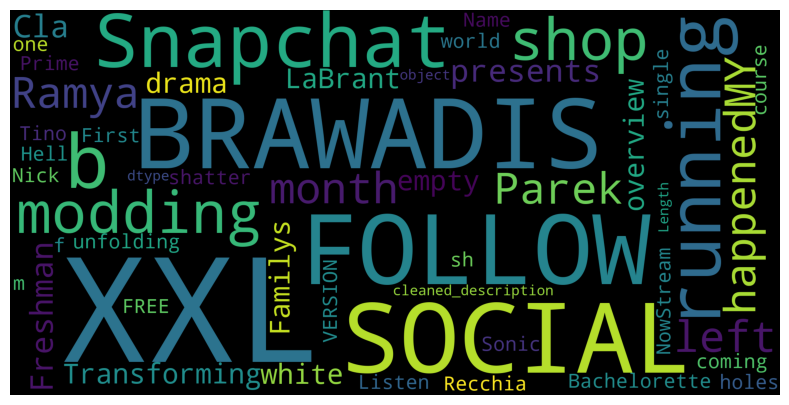

In [17]:
# Visualize our word cloud
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')